In [2]:
# Importing vital libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap
from bokeh.palettes import Bright6, Spectral6, HighContrast3
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, FactorRange



In [3]:
# Load cats videos dataset
df = pd.read_csv("catsVidInfo.csv")
df.head(5)

,id,views,duration,likes,dislikes,comments,favorites
0,pxn0wL_uSm4,6063813,PT30M27S,22223,None_key,928,0
1,VAH-ixdFWFs,14420753,PT20M1S,59592,None_key,1918,0
2,sbvAcB0GGTU,744175,PT12S,8497,None_key,113,0
3,NU1DXw297KA,49685889,PT21S,1033078,None_key,8647,0
4,Zg6ainv9ujw,19299767,PT10S,696306,None_key,14395,0


In [4]:
# Check columns
df.columns

Index(['id', 'views', 'duration', 'likes', 'dislikes', 'comments',
       'favorites'],
      dtype='object')

In [5]:
# Subset columns
df = df[['id', 'views', 'duration', 'likes', 'comments',
       'favorites']]
df = df.copy()

In [6]:
df.dtypes

id           object
views         int64
duration     object
likes        object
comments     object
favorites     int64
dtype: object

In [7]:
# Type casting
if "views" in df.columns:
    df["views"] = pd.to_numeric(df["views"], errors='coerce').fillna(0).astype(int)

if "comments" in df.columns:
    df["comments"] = pd.to_numeric(df["comments"], errors='coerce').fillna(0).astype(int)

if "favorites" in df.columns:
    df["favorites"] = pd.to_numeric(df["favorites"], errors='coerce').fillna(0).astype(int)

In [8]:
df.dtypes

id           object
views         int32
duration     object
likes        object
comments      int32
favorites     int32
dtype: object

In [9]:
# Key stats abt the data
df.describe()

,views,comments,favorites
count,5.000000e+01,50.000000,50.0
mean,3.054579e+07,8309.120000,0.0
std,5.895411e+07,18982.290681,0.0
min,1.864310e+05,0.000000,0.0
25%,1.045150e+06,99.500000,0.0
50%,6.766760e+06,1581.000000,0.0
75%,3.181344e+07,8608.250000,0.0
max,3.094788e+08,104989.000000,0.0


In [10]:
df.loc[df["comments"] == "Non_key"]

,id,views,duration,likes,comments,favorites


id           0
views        0
duration     0
likes        0
comments     0
favorites    0
dtype: int64


<Axes: >

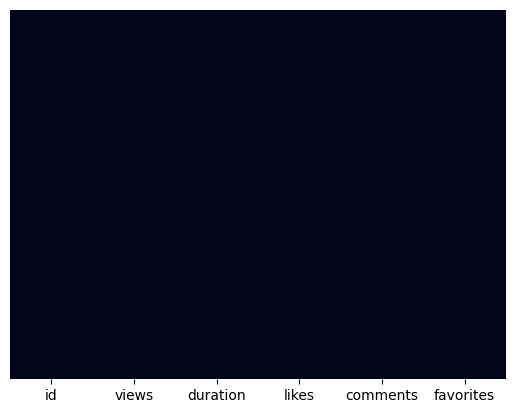

In [11]:
# Trace nulls
print(df.isna().sum())
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)


WE Now WANT TO DETERMINE THE FAVORITE PET DePENDING ON FACTORS SUCH AS
 NO. OF LIKES, VIEWS, and COMMENTS

In [13]:
df['views'] = pd.to_numeric(df['views'], errors='coerce')
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['comments'] = pd.to_numeric(df['comments'], errors='coerce')

print("Key stats: ", df.agg({"views": [min, max,"mean"],
                             "likes": [min, max,"mean"],
                             "comments": [min, max,"mean"],
                            }))

Key stats:              views         likes   comments
min      186431.0  5.120000e+02       0.00
max   309478820.0  5.807534e+06  104989.00
mean   30545792.9  5.796162e+05    8309.12


C:\Users\mulwa\AppData\Local\Temp\ipykernel_19220\1291417686.py:5: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print("Key stats: ", df.agg({"views": [min, max,"mean"],
C:\Users\mulwa\AppData\Local\Temp\ipykernel_19220\1291417686.py:5: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  print("Key stats: ", df.agg({"views": [min, max,"mean"],


In [14]:
# Locate the video ids with most likes and comments
print(f'Most liked cat vid: {df.loc[df["likes"] == 5.807534e+06]}')
print(f'Most viewed cat vid: {df.loc[df["views"] == 186431.0]}')
print(f'Most commented cat vid: {df.loc[df["comments"] == 104989.00]}')

Most liked cat vid:             id      views duration      likes  comments  favorites
5  lOKASgtr6kU  226966051  PT15M3S  5807534.0    104989          0
Most viewed cat vid:             id   views  duration  likes  comments  favorites
8  e28-AugjVAw  186431  PT10M57S  944.0        27          0
Most commented cat vid:             id      views duration      likes  comments  favorites
5  lOKASgtr6kU  226966051  PT15M3S  5807534.0    104989          0


             id      views  duration      likes  comments  favorites
19  c2OTHeCKsBE  309478820      PT2M   437873.0      5897          0
5   lOKASgtr6kU  226966051   PT15M3S  5807534.0    104989          0
31  v8BtZ8IdoNY  134044933  PT24M42S   254391.0         0          0
12  u4XbDY2BHCU  119420999     PT13S        NaN      6551          0
28  OVwuPittcS8  114216293     PT21S  1215615.0       636          0


<Figure size 640x480 with 0 Axes>

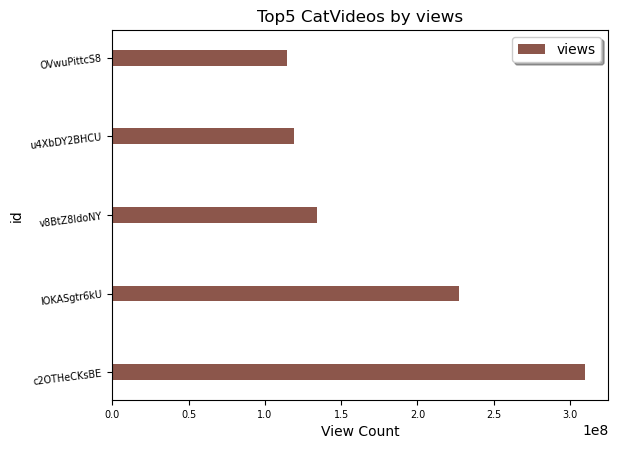

In [15]:
# Top 5 Cat Videos by views
top_5 = df.sort_values(by="views", ascending=False).head(n=5)
print(top_5)
plt.tight_layout()
plot = top_5.plot(x="id", y="views", kind="barh", rot=7 ,fontsize=7, color="tab:brown", 
          width=.2)
plot.set_xlabel("View Count")
plot.set_title("Top5 CatVideos by views")
plt.legend(shadow=True)
plt.show()


             id      views duration      likes  comments  favorites
5   lOKASgtr6kU  226966051  PT15M3S  5807534.0    104989          0
26  NKjiKF-6OgE   70534601    PT57S  4580757.0     80189          0
38  ZM68sTmKPz8   34435871    PT30S  1802299.0     25977          0
23  4-yPeCpk0zg   36243466    PT14S  1800662.0     11400          0
30  c0UWhMr2vI8   18351528    PT16S  1333806.0     23083          0


<Figure size 640x480 with 0 Axes>

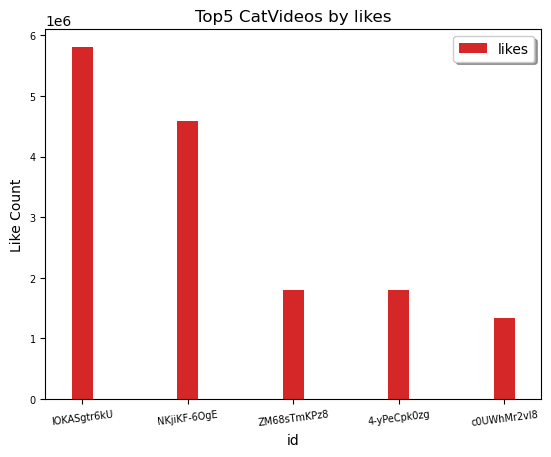

In [16]:
# Top 5 Cat Videos by likes
top_5 = df.sort_values(by="likes", ascending=False).head(n=5)
print(top_5)
plt.tight_layout()
plot = top_5.plot(x="id", y="likes", kind="bar", rot=7 ,fontsize=7, color="tab:red", 
          width=.2,)
plot.set_ylabel("Like Count")
plot.set_title("Top5 CatVideos by likes")
plt.legend(shadow=True)
plt.show()



             id      views duration      likes  comments  favorites
5   lOKASgtr6kU  226966051  PT15M3S  5807534.0    104989          0
26  NKjiKF-6OgE   70534601    PT57S  4580757.0     80189          0
47  zgDqacz5g1E   16821140    PT28S  1062402.0     34273          0
38  ZM68sTmKPz8   34435871    PT30S  1802299.0     25977          0
30  c0UWhMr2vI8   18351528    PT16S  1333806.0     23083          0


<Figure size 640x480 with 0 Axes>

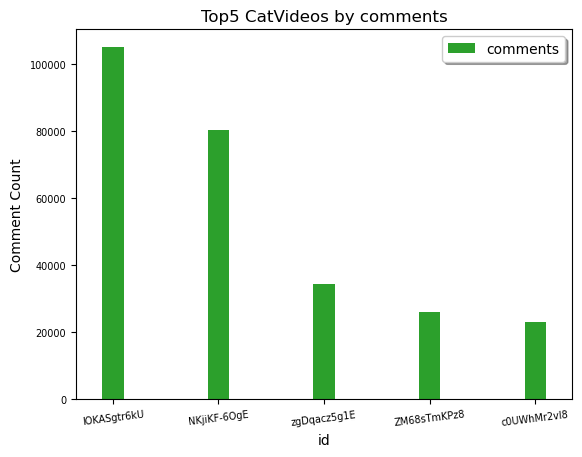

In [17]:
# Top 5 Cat Videos by comments
top_5 = df.sort_values(by="comments", ascending=False).head(n=5)
print(top_5)
plt.tight_layout()
plot = top_5.plot(x="id", y="comments", kind="bar", rot=7 ,fontsize=7, color="tab:green", 
          width=.2)
plot.set_ylabel("Comment Count")
plot.set_title("Top5 CatVideos by comments")
plt.legend(shadow=True)
plt.show()


RENDER SOME BOKEH PLOTS
Steps:
-prepare data(lists, dicts, CDS->(df, grpby() obj))
-

In [19]:
# Load bokeh so that its plots are displayed inline
output_notebook()

# Grab top5 most viewed videos
top_5 = df.sort_values(by="views", ascending=False).head(n=5)
print(type(top_5))

# Convert the data to a CDS(ColumnDataSource)
source = ColumnDataSource(data=dict(x=top_5.id.astype(str), y=top_5.views, color=Bright6))  # Convert IDs to strings
print(type(source))

# Create a plot with categorical x-axis
fig = figure(x_range=FactorRange(*top_5.id.astype(str)), title="Top 5 Most Viewed Cat Videos", height=350,
             width=500, x_axis_label="VideoId", y_axis_label="View Count", toolbar_location=None, tools="")

fig.vbar(x="x", top="y", source=source, color="color", width=0.4, legend_field="x")  # Adjusted width to minimize overlap
fig.xgrid.grid_line_color = None
fig.legend.orientation = "vertical"
fig.legend.location = "top_right"
# Display the plot
show(fig)

Loading BokehJS ...

<class 'pandas.core.frame.DataFrame'>
<class 'bokeh.models.sources.ColumnDataSource'>


In [20]:
top_5 = df.sort_values(by="likes", ascending=False).head(n=5)

# Create a ColumnDataSource for the plot
source = ColumnDataSource(data=dict(x=top_5.id.astype(str), y=top_5.likes))

# Define the figure
fig = figure(x_range=FactorRange(*top_5.id.astype(str)), title="Top 5 Most Liked Cat Videos",
             x_axis_label="Video ID", y_axis_label="Like Count", 
             height=300, width=500, toolbar_location=None, tools="hover", tooltips="$name @x: @$name")

# Add vertical bars
fig.vbar(x='x', top='y', width=0.5, source=source, legend_field="x",
         line_color='white', fill_color=factor_cmap('x', palette=Spectral6,
         factors=top_5.id.astype(str).tolist()))

# Customize the grid and legend
fig.xgrid.grid_line_color = None
fig.axis.minor_tick_line_color = None
fig.legend.orientation = "vertical"
fig.legend.location = "top_right"

# Display the plot
show(fig)

In [21]:
# Top5 most commented cat videos
top_5 = df.sort_values(by="comments", ascending=False).head(5)

# CDS
color = HighContrast3 
source = ColumnDataSource(data=dict(x=top_5.id.astype(str), y=top_5.comments, color=color))

# plotting
fig = figure(x_range=FactorRange(*top_5.id.astype(str)), title="Top 5 Most Commented Cat Videos", height=350,
             width=500, x_axis_label="VideoId", y_axis_label="Comment Count", toolbar_location=None, tools="")

fig.vbar(x='x', top='y', width=0.5, source=source, legend_field="x",
         line_color='white', color="color")

# Customize the grid and legend
fig.xgrid.grid_line_color = None
fig.axis.minor_tick_line_color = None
fig.legend.orientation = "vertical"
fig.legend.location = "top_right"

# Display the plot
show(fig)